Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


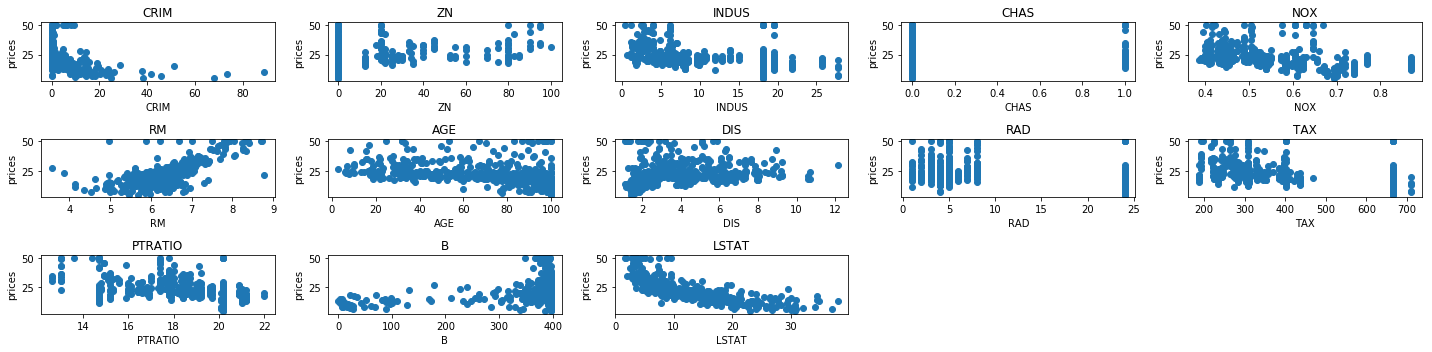

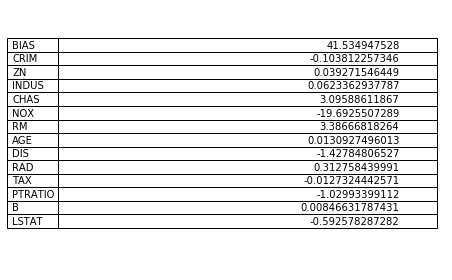

In [56]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X,y,features


def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        #Plot feature i against y
        plt.plot(X[:, i], y, 'o')
        plt.title(features[i])
        plt.xlabel(features[i])
        plt.ylabel('prices')
    
    plt.tight_layout()
    plt.show()

    
def split(X, Y):
    # split test and train
    X_test = []
    Y_test = []
    X_train = list(X)
    Y_train = list(Y)
    test_size = int(0.2 * len(X))
    
    for i in range(0, test_size):
        index = np.random.choice(len(X_train), 1)
        X_test.append(X_train.pop(index[0]))
        Y_test.append(Y_train.pop(index[0]))

    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    return X_test, Y_test, X_train, Y_train
    

def tabulate(features, w):
    # tabulate w with featrues
    plt.axis('off'
    
    col_labels = [i for i in features]
    col_labels = ['BIAS'] + col_labels
    cellText = [[i] for i in w]
    plt.table(cellText=cellText,rowLabels=col_labels,loc='center')
    
    plt.tight_layout()
    plt.show()

def mean_squared_error(target, predict):
    # calculate error #1
    total_error = 0
    n = len(target)
    for i in range(n):
        error = (target[i] - predict[i])**2
        total_error += error
    return total_error/n

def error_sum(target, predict):
    # calculate error #2
    total_error = 0
    n = len(target)
    for i in range(n):
        total_error  += abs(target[i] - predict[i])
    return total_error

def error_squared_sum(target, predict):
    # calculate error #3
    total_error = 0
    n = len(target)
    for i in range(n):
        error = (target[i] - predict[i])**2
        total_error += error
    return total_error

    
def add_bias(X):
    # helper
    bias = np.ones(shape=(X.shape[0], 1))
    X = np.append(bias, X, axis=1)
    return X

def linear_solver(X, Y):
    # helper
    X = add_bias(X)

    a = np.dot(X.T , X)
    b = np.dot(X.T , Y)
    w = np.linalg.solve(a, b)
    return w


def fit_regression(X,Y):
    
    # perform linear regression to predict the targets using the training data 
    
    return linear_solver(X, Y)
    

def main():
    # Load the data
    X, y, features = load_data()
    print("Features: {}".format(features))
    
    print(X.shape)
    
    
    # Visualize the features
    visualize(X, y, features)

    #Split data into train and test
    X_test, Y_test, X_train, Y_train = split(X, y)
        
    
    # Fit regression model
    w = fit_regression(X_train, Y_train)

    tabulate(features, w)

    # Compute fitted values, MSE, etc
    X_test = add_bias(X_test)
    prediction = np.dot(X_test, w.transpose())
    
    mean_squared_error(Y_test, prediction)
    error_sum(Y_test, prediction)
    error_squared_sum(Y_test, prediction)
   
    


if __name__ == "__main__":
    main()


NameError: name 'X_train' is not defined